## Schwarzschild like solution
### Production script for the rZero book! stay safe!
Idea is to (likely numerically?) figure out a solution with Katz like energy - with energy counted as mass.


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


#Code it up

count:  875210
drBar:  1.0000149928565946e-07
totalMassIso: 0.9999999500744867
totalMassS: 0.9999999500744267
currentRS: 200002.18823886456


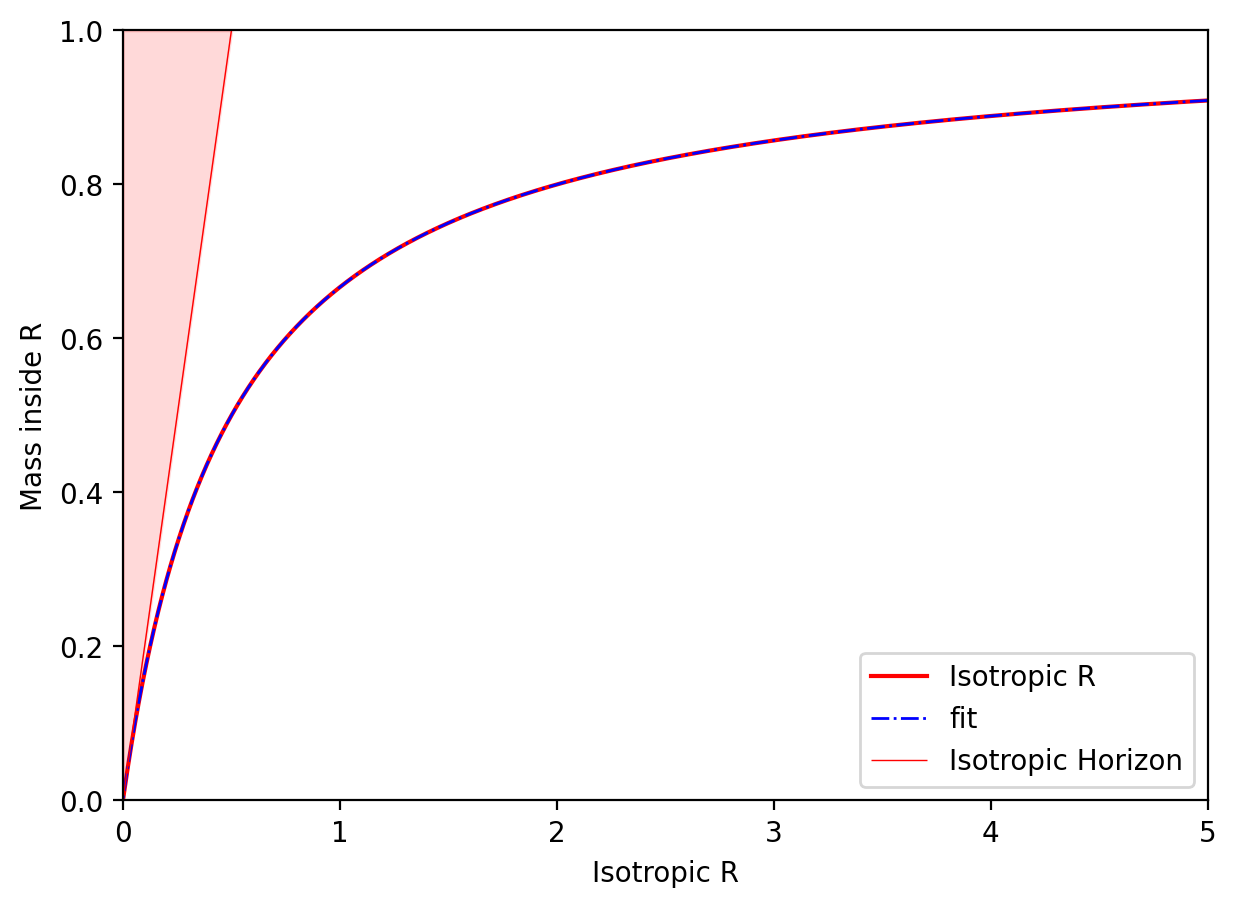

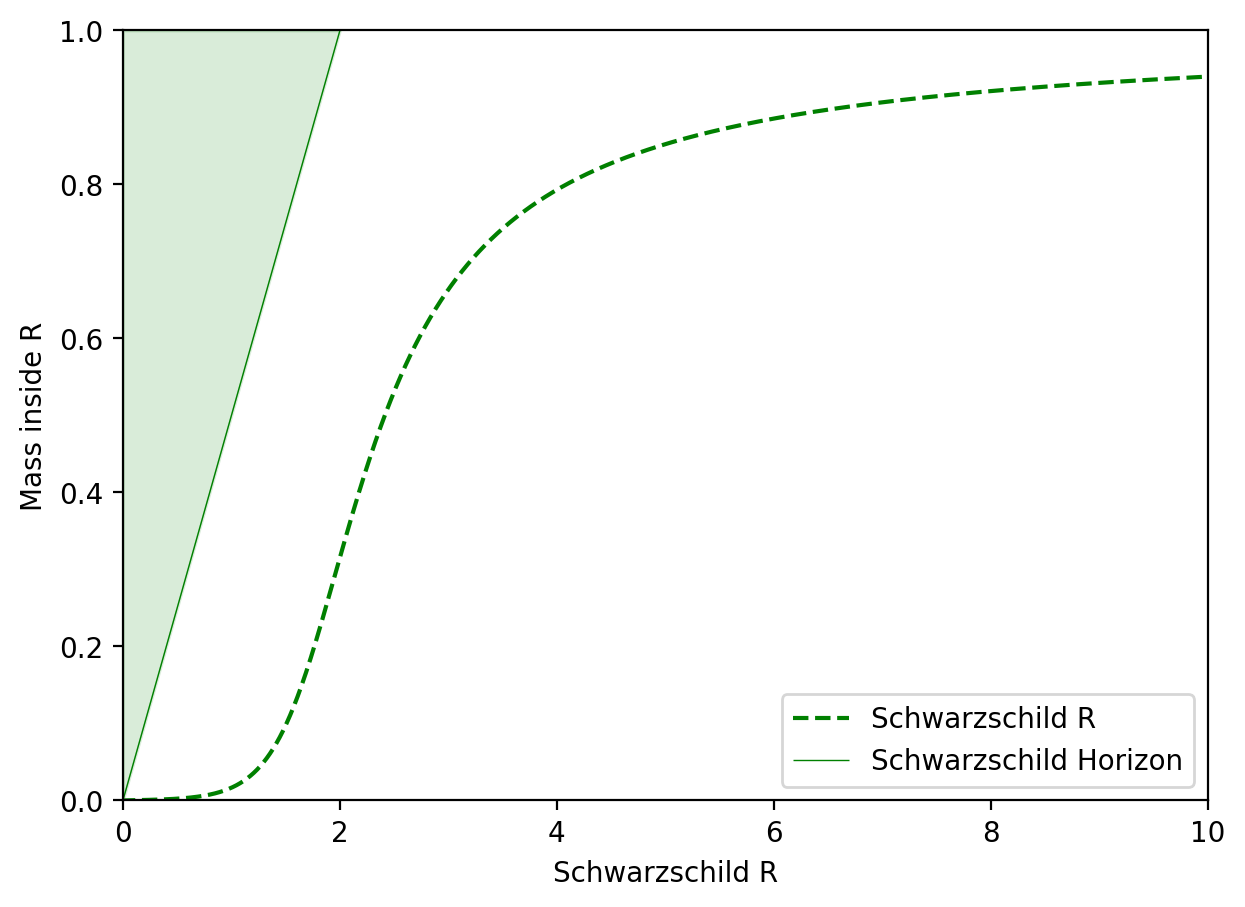

In [2]:
maxPoints = 5000000 # so we don't wipe out...
outerR = 200000.0 # should be infinity, but this is numerics. Consider this as "Schwarzschild radius' away from source"

# Create some lists that we will use to store the results
massInsides = [] #mass inside point 'i'
rBars = [] #iso radius we are at. Remember that the coordinate system is ISO, NOT Schwarzschild ISO...
drBars = [] # step size we use for point 'i'
katzs = [] # the mass between rBar and rBar + drBar
fits = [] # Try (and succeed) in finding a formular for the resulting mass inside rBar

# solution properties
M = 1 # mass at infinity 
k = 1/2 # Katz formula is (dr)*1/2GM^2/r^2, G == 1, c == 1
# prev is mass inside r, it starts with all the mass inside r at 'infinity...'
prev = M
rBar = outerR # we start at the outside and move in.
stepFraction = 0.00002 # fraction of rBar... so make steps smaller as we approach the min
minStep = 0.0000001 # smallest possible step, to avoid Mr Zeno
totalMassIso = 0.0
# Here we go. 
for count in range(maxPoints):
    rBars.append(rBar)

    drBar = rBar*stepFraction + minStep # step, step size is proportional to rbar...
    drBars.append(drBar)
    
    #katz is gravitational field mass/energy from rBar to rBar + dr - see Lynden-Bell - Katz 1985 "Gravitational field energy density for spheres and black holes"
    midR = rBar + drBar/2 # use midpoint... - more accurate as I tested...
    katz = drBar*k*prev*prev/(midR*midR) # that's how much mass we needed to drop into the gravitational field to take this step.
    katzs.append(katz)
    
    massInsideRbar = prev - katz
    massInsides.append(massInsideRbar)

    # calc total mass - should agree with M 
    totalMassIso += katz

    
    # find a good fit
    # This is THE function.... - you can see from the graphs 
    y = M - M/(1 + 2*rBar/M)
    fits.append(y)
    
    #get ready for next step
    prev = massInsideRbar
    rBar -= drBar

    #check if we are done. Taking steps around minStep by this point
    if rBar < 0:
        print('count: ', count) 
        print('drBar: ', drBar)
        break


# Schwarzschild coordinate system radius calculation
# I need to start from the inner most (ie last) point in the arrays and walk outward to determine the Schwarschild r measurement.
totalMassS = 0.0 
currentRS = 0 #Schwarzschild R
rSs = []
for i in range(len(drBars) - 1, -1, -1):
    drBar = drBars[i]
    rBar = rBars[i]
    massBirchoff = massInsides[i]
    totalMassS += katzs[i] # kinda trivial - we step over the same shells as in the ISO calculation...

    # (see katz 1985 bottom pg 23p))
    # take correct derivative of katz equation to get dr/drBar at a given mass
    localRSFactor = (1 - massBirchoff/(2*rBar))**2 + (massBirchoff*(1 - massBirchoff/(2*rBar)))/rBar
    # NOlocalRSFactor = (1 - massBirchoff/(rBar))**2 + (massBirchoff*(1 - massBirchoff/(rBar)))/rBar
    currentRS += drBar/localRSFactor
    rSs.append(currentRS)

#rSs is in the reverse order of all the other lists
rSs.reverse()

print('totalMassIso:',totalMassIso)
print('totalMassS:',totalMassS)
print('currentRS:',currentRS)
#print('rSs:',rSs)

#plot the ISO graph
fig = plt.figure(figsize=(7, 5), dpi=200)
plt.plot(rBars, massInsides, marker="none", color='red', lw=1.5, label='Isotropic R')
plt.plot(rBars,fits, marker="none", color='blue' , linestyle='-.', lw=1.0, label='fit')
plt.xlabel('Isotropic R');
plt.ylabel('Mass inside R');
lc = matplotlib.collections.LineCollection([[(0, 0), (0.5, 1.0)]], color="r", lw=0.5, label='Isotropic Horizon')
plt.gca().add_collection(lc)
horizonXs = [0,0.5]
horizonY1 = [0,1.0]
horizonY2 = [1.0,1.0]
plt.fill_between(horizonXs, horizonY1, horizonY2, color='r', alpha=.15)

plt.legend(loc='lower right')
plt.axis((0, 5*M, 0.0, 1*M));
plt.savefig('../chapters/images/no-horizons.png', bbox_inches='tight')
plt.show()

#plot the Schwarzschild graph
fig = plt.figure(figsize=(7, 5), dpi=200)
plt.plot(rSs, massInsides, marker="none", color='green', linestyle='dashed', lw=1.5, label='Schwarzschild R')
plt.xlabel('Schwarzschild R');
plt.ylabel('Mass inside R');
lc = matplotlib.collections.LineCollection([[(0, 0), (2.0, 1.0)]], color="g", lw=0.5, label='Schwarzschild Horizon')
plt.gca().add_collection(lc)
horizonXs = [0,2.0]
horizonY1 = [0,1.0]
horizonY2 = [1.0,1.0]
plt.fill_between(horizonXs, horizonY1, horizonY2, color='g', alpha=.15)
plt.legend(loc='lower right')
plt.axis((0, 10*M, 0.0, 1*M));
plt.savefig('../chapters/images/no-horizons-s.png', bbox_inches='tight')
plt.show()


# #define my plot
# def my_plot(rBars, massInsides, rSs, fits):
#     fig = plt.figure(figsize=(7, 5), dpi=200)
#     plt.plot(rBars, massInsides, marker="none", color='red', lw=1.5, label='ISO R')
#     plt.plot(rSs, massInsides, marker="none", color='green', linestyle='dashed', lw=1.5, label='Schwarzschild R')
#     plt.xlabel('Isotropic R (red) or Schwarzschild R (green)');
#     plt.ylabel('Mass inside R');
#     #plt.vlines(horizonR, ymin=0, ymax=1)

#     # Takes list of lines, where each line is a sequence of coordinates
#     lc = matplotlib.collections.LineCollection([[(0, 0), (0.5, 1.0)]], color="r", lw=0.5, label='ISO Horizon')
#     plt.gca().add_collection(lc)
    
#     lc = matplotlib.collections.LineCollection([[(0, 0), (2.0, 1.0)]], color="g", lw=0.5, label='Schwarzschild Horizon')
#     plt.gca().add_collection(lc)


#     plt.plot(rBars,fits, marker="none", color='blue' , linestyle='-.', lw=1.0, label='fit')
#     plt.legend()





# observations. 

The ISO slope is 2 near the origin. r == 0 is 'zero mass' - no singularity, no horizon...
For ISO (purple/red line) only a horizon if red line goes above the slope 2 line. 
For Schwarschild only a horizon if green line goes above line with slope 1/2. 

Remember, the slope is almost 2 in isotropic coordinates near the origin

I am looking for this online....

# Calculate the integral...

The mass should add up to M